# Exploring Historic Wildfire Data

This notebook explores historic wildfire data from 1878-2019

Data can be downloaded here: [Historic Wildfires](https://www.sciencebase.gov/catalog/item/5ee13de982ce3bd58d7be7e7)



In [30]:
# Load desired packages

%matplotlib inline

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import fiona

# change default figsize
plt.rcParams['figure.figsize'] = (15, 12)

In [4]:
# Load wildfire dataset
wf = gpd.read_file('../rawData/wildfire.geojson')

In [5]:
# Inspect data
wf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65845 entries, 0 to 65844
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FireName    65845 non-null  object  
 1   FireCode    65845 non-null  object  
 2   FireYear    65845 non-null  int64   
 3   IgntDate    65845 non-null  object  
 4   ContrlDate  65845 non-null  object  
 5   ContnDate   65845 non-null  object  
 6   Acres       65845 non-null  float64 
 7   Hectares    65845 non-null  float64 
 8   DataSrc     65845 non-null  object  
 9   DataNotes   65845 non-null  object  
 10  FireCause   65845 non-null  object  
 11  FoundIn     65845 non-null  object  
 12  FndNames    65845 non-null  object  
 13  FndCodes    65845 non-null  object  
 14  FndDates    65845 non-null  object  
 15  FireQual    65845 non-null  int64   
 16  Shape_Leng  65845 non-null  float64 
 17  Shape_Area  65845 non-null  float64 
 18  geometry    65845 non-null  geometry
d

In [6]:
# View data as a table
wf.head()

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
0,414008,AK6535415457219840611,1984,1984-06-11T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,3169.156439,1282.513243,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414008,Alternate Fire Codes: AK6535415457219840611,"Alternate Ignition, Controlled, and Contained ...",1,22876.846278,1.282513e+07,"POLYGON ((-2729116.221 3783619.593, -2729145.4..."
1,414012,AK6621715235619840618,1984,1984-06-18T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,1964.386646,794.959774,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414012,Alternate Fire Codes: AK6621715235619840618,"Alternate Ignition, Controlled, and Contained ...",1,17290.576444,7.949598e+06,"POLYGON ((-2587275.964 3793164.935, -2587865.3..."
2,414057,AK6495716269319840702,1984,1984-07-02T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,1688.849283,683.453661,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414057,Alternate Fire Codes: AK6495716269319840702,"Alternate Ignition, Controlled, and Contained ...",1,11226.497241,6.834537e+06,"POLYGON ((-3073104.885 3996965.523, -3073150.9..."
3,414060,AK6379515502919840623,1984,1984-06-23T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,1399.226822,566.247506,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414060,Alternate Fire Codes: AK6379515502919840623,"Alternate Ignition, Controlled, and Contained ...",1,18047.888216,5.662475e+06,"POLYGON ((-2841528.411 3660892.172, -2841529.3..."
4,ABERT,OR4258812018119840809,1984,1984-08-09T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,7945.460289,3215.416542,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: Abert, Abert, ABERT","Alternate Fire Codes: M053, M053, OR4258812018...","Alternate Ignition, Controlled, and Contained ...",1,73017.681929,3.215417e+07,"POLYGON ((-1839066.540 551133.989, -1839017.70..."


In [7]:
# Fire statistics by fire year

wf.groupby('FireYear').agg(['count', 'min', 'max', 'mean'])

Acres                                            Hectares  \
         count           min            max          mean    count   
FireYear                                                             
1878         2  39178.967618   59468.829804  49323.898711        2   
1889        90     29.880295   98985.008853   9248.857692       90   
1890        33     13.221893   21741.371830   2844.077359       33   
1893         2    892.215342   10726.159001   5809.187171        2   
1894         6   1301.493972   44562.451666  10274.898434        6   
...        ...           ...            ...           ...      ...   
2015      2018      0.002612  407461.216395   5350.126563     2018   
2016      2159      0.002466  374523.359306   2986.744162     2159   
2017      2528      0.000860  657298.930324   4246.361276     2528   
2018      1834      0.001199  677032.736045   3871.330894     1834   
2019      1455      0.000780  465280.633101   2826.651948     1455   

                                                    FireQual          \
                   min            max          mean    count min max   
FireYear                                                               
1878      15855.179690   24066.202858  19960.691274        2   2   2   
1889         12.092137   40057.847293   3742.883224       90   2   2   
1890          5.350715    8798.428800   1150.958290       33   2   2   
1893        361.067058    4340.726381   2350.896720        2   2   2   
1894        526.696390   18033.800315   4158.107548        6   2   2   
...                ...            ...           ...      ...  ..  ..   
2015          0.001057  164893.849818   2165.121318     2018   1   2   
2016          0.000998  151564.360184   1208.693548     2159   1   2   
2017          0.000348  265999.674917   1718.442959     2528   1   3   
2018          0.000485  273985.669819   1566.673414     1834   2   2   
2019          0.000316  188292.558287   1143.906470     1455   2   2   

                   Shape_Leng                                            \
              mean      count           min           max          mean   
FireYear                                                                  
1878      2.000000          2  77928.065395  8.843972e+04  83183.890560   
1889      2.000000         90   1973.447881  4.442109e+05  37081.849381   
1890      2.000000         33   1086.182788  9.215747e+04  19305.894841   
1893      2.000000          2  10482.691501  4.906366e+04  29773.174526   
1894      2.000000          6  13950.475753  9.971916e+04  31726.465449   
...            ...        ...           ...           ...           ...   
2015      1.625372       2018     13.555465  1.114945e+06  23941.254070   
2016      1.672070       2159     15.386214  1.390098e+06  16911.940201   
2017      1.666930       2528      8.324163  8.533072e+05  21826.336879   
2018      2.000000       1834      9.038563  1.133554e+06  14836.205726   
2019      2.000000       1455      8.538432  9.516479e+05  13606.805111   

         Shape_Area                                            
              count           min           max          mean  
FireYear                                                       
1878              2  1.585518e+08  2.406620e+08  1.996069e+08  
1889             90  1.209214e+05  4.005785e+08  3.742883e+07  
1890             33  5.350715e+04  8.798429e+07  1.150958e+07  
1893              2  3.610671e+06  4.340726e+07  2.350897e+07  
1894              6  5.266964e+06  1.803380e+08  4.158108e+07  
...             ...           ...           ...           ...  
2015           2018  1.056970e+01  1.648938e+09  2.165121e+07  
2016           2159  9.981314e+00  1.515644e+09  1.208694e+07  
2017           2528  3.480467e+00  2.659997e+09  1.718443e+07  
2018           1834  4.850550e+00  2.739857e+09  1.566673e+07  
2019           1455  3.156407e+00  1.882926e+09  1.143906e+07  

[128 rows x 20 columns]

## Visualizing Wildfires

Visually exploring wildfire trends

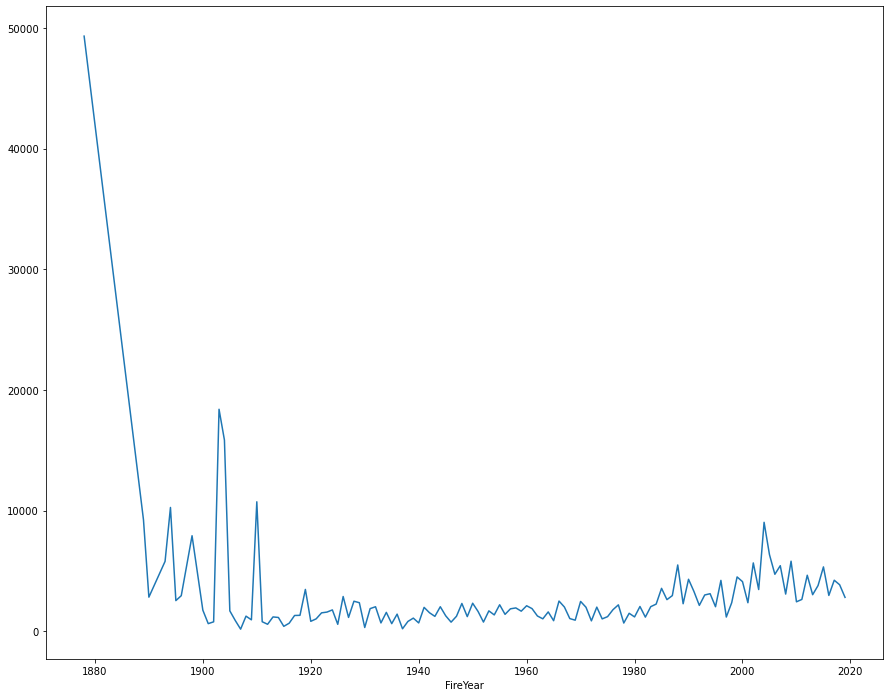

In [8]:
# Average fire size each year

acYearMean = wf.groupby('FireYear').Acres.mean()

acYearMean.plot();

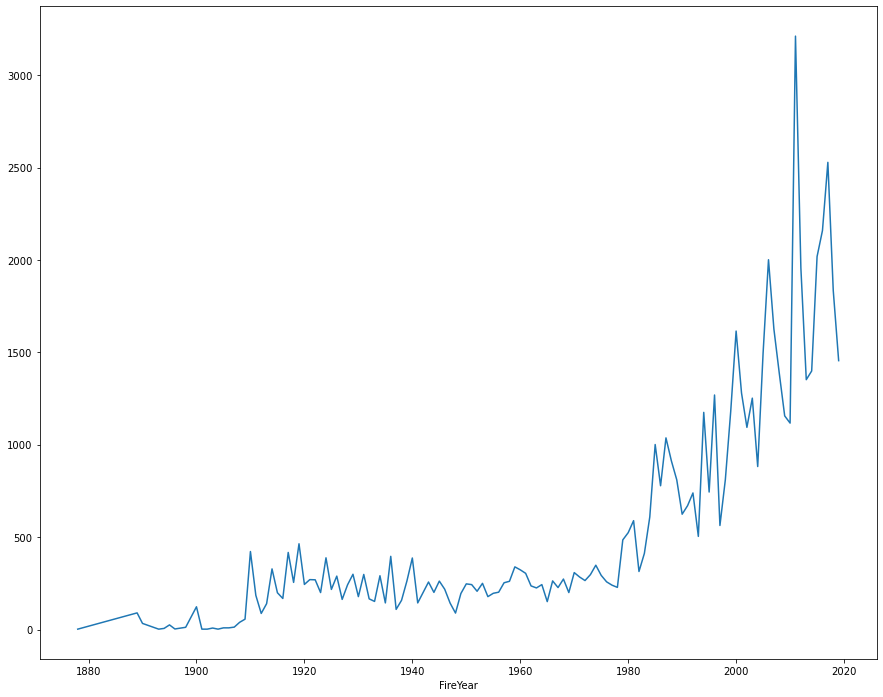

In [9]:
# Number of wildfires per year

fireCount = wf.groupby('FireYear').count()
fireCount.FireName.plot();

In [17]:
# Create a decade subset to troubleshoot loading fire data into webpage

y2ks = wf[(wf['FireYear'] == 2010) | (wf['FireYear'] == 2011) | (wf['FireYear'] == 2012) | 
        (wf['FireYear'] == 2013) | (wf['FireYear'] == 2014) | (wf['FireYear'] == 2015) | 
        (wf['FireYear'] == 2016) | (wf['FireYear'] == 2017) | (wf['FireYear'] == 2018) |
        (wf['FireYear'] == 2019)]

y2ks

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
11376,1003131,TX3399410219220100313,2010,2010-03-13T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,1739.196894,703.828634,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 1003131,Alternate Fire Codes: TX3399410219220100313,"Alternate Ignition, Controlled, and Contained ...",1,15639.992103,7.038286e+06,"POLYGON ((-543016.878 -685994.527, -542965.563..."
11377,1003311,TX3413210226620100331,2010,2010-03-31T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,2242.666717,907.575823,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 1003311,Alternate Fire Codes: TX3413210226620100331,"Alternate Ignition, Controlled, and Contained ...",1,19019.173252,9.075758e+06,"POLYGON ((-547696.759 -669355.465, -547728.804..."
11378,304,TX3148310284320101115,2010,2010-11-15T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,2917.615672,1180.718216,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,"Alternate Fire Names: Armstrong Franks, 304","Alternate Fire Codes: 2010-TX-TXS-74, TX314831...","Alternate Ignition, Controlled, and Contained ...",1,24097.974457,1.180718e+07,"POLYGON ((-624148.506 -972409.976, -624166.733..."
11379,35 MILE MARKER,WY4367010484520100827,2010,2010-08-27T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,5054.223862,2045.373638,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 35 MILE MARKER,Alternate Fire Codes: WY4367010484520100827,"Alternate Ignition, Controlled, and Contained ...",1,27871.180191,2.045374e+07,"POLYGON ((-667616.564 464625.371, -667568.350 ..."
11380,755,TX2676809835420101201,2010,2010-12-01T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,2030.300822,821.634319,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,"Alternate Fire Names: Encinitos, ENCINITOS RAN...","Alternate Fire Codes: 2010-TX-TXS-3, TX2676709...","Alternate Ignition, Controlled, and Contained ...",1,23666.546857,8.216343e+06,"POLYGON ((-228994.742 -1533428.479, -229002.86..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65840,Hot Springs,GHP4,2012,1899-11-30T00:00:00,1899-11-30T00:00:00,2012-10-04T00:00:00,33819.911344,13686.444642,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Hot Springs,Alternate Fire Codes: GHP4,"Alternate Ignition, Controlled, and Contained ...",3,113953.668293,1.368644e+08,"POLYGON ((-1667571.260 356308.189, -1667601.80..."
65841,Owyhee,HM3X,2012,1899-11-30T00:00:00,1899-11-30T00:00:00,2012-07-07T00:00:00,46548.683372,18837.600479,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Owyhee,Alternate Fire Codes: HM3X,"Alternate Ignition, Controlled, and Contained ...",3,133304.042159,1.883760e+08,"MULTIPOLYGON (((-1592394.618 601674.732, -1592..."
65842,Bone Creek Basin,JEL8,2013,1899-11-30T00:00:00,1899-11-30T00:00:00,2013-08-26T00:00:00,20484.713703,8289.876850,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Bone Creek Basin,Alternate Fire Codes: JEL8,"Alternate Ignition, Controlled, 

In [18]:
# Create GeoJSON of y2k

y2ks.to_file('../rawData/wfs.geojson', driver="GeoJSON")

In [31]:
# Create a 2019 subset to troubleshoot loading fire data into webpage

y2k19 = wf[(wf['FireYear'] == 2019)]

y2k19

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
63986,083 Blue Ridge,2019-ORMAF-019083,2019,1899-11-30T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,671.846716,271.886960,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,Alternate Fire Names: 083 Blue Ridge,Alternate Fire Codes: 2019-ORMAF-019083,"Alternate Ignition, Controlled, and Contained ...",2,6841.471381,2.718870e+06,"POLYGON ((-1737123.633 714061.045, -1737170.22..."
63987,100 South,MG0J,2019,2019-07-22T00:00:00,2019-07-22T00:00:00,1899-11-30T00:00:00,15.031115,6.082882,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Human,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: 100 South, 100 South","Alternate Fire Codes: MG0J, MG0J","Alternate Ignition, Controlled, and Contained ...",2,1322.576248,6.082882e+04,"POLYGON ((-1384562.390 -126274.031, -1384563.8..."
63988,160 Middle Ridge,2019-ORUMF-019160,2019,1899-11-30T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,2708.906120,1096.256382,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,"Alternate Fire Names: 160 Middle Ridge, 161, 1...","Alternate Fire Codes: 2019-ORUMF-019160, 2019-...","Alternate Ignition, Controlled, and Contained ...",2,42877.304900,1.096256e+07,"MULTIPOLYGON (((-1722329.120 808717.932, -1722..."
63989,17 Mile,MMG3,2019,2019-08-13T00:00:00,2019-08-13T00:00:00,1899-11-30T00:00:00,11.676700,4.725397,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Human,Alternate Fire Sources: BLM National Fire Peri...,Alternate Fire Names: 17 Mile,Alternate Fire Codes: MMG3,"Alternate Ignition, Controlled, and Contained ...",2,904.462930,4.725397e+04,"POLYGON ((-1236640.377 524691.514, -1236641.62..."
63990,18,MJ15,2019,2019-07-31T00:00:00,2019-08-01T00:00:00,1899-11-30T00:00:00,16.134956,6.529591,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Unknown,Alternate Fire Sources: BLM National Fire Peri...,Alternate Fire Names: 18,Alternate Fire Codes: MJ15,"Alternate Ignition, Controlled, and Contained ...",2,2130.933795,6.529591e+04,"MULTIPOLYGON (((-1820270.656 -446693.187, -182..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65436,Yale,MNB8,2019,2019-08-20T00:00:00,2019-08-20T00:00:00,1899-11-30T00:00:00,3.426372,1.386605,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,Unknown,Alternate Fire Sources: BLM National Fire Peri...,Alternate Fire Names: Yale,Alternate Fire Codes: MNB8,"Alternate Ignition, Controlled, and Contained ...",2,643.951177,1.386605e+04,"POLYGON ((-1335059.389 447376.657, -1335059.98..."
65437,YANKS,2019-AZCNF-000187,2019,2019-05-20T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,226.829272,91.794631,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,"Alternate Fire Names: YANKS, YANKS","Alternate Fire Codes: 2019-AZCNF-000187, 2019-...","Alternate Ignition, Controlled, and Contained ...",2,5634.056439,9.179463e+05,"POLYGON ((-1386341.051 -883784.673, -1386343.7..."
65438,YELLOW BLUFF 17 1,2019-FLFLS-070174,2019,1899-11-30T00:00:00,1899-11-30T00:00:00,1899-11-30T00:00:00,554.839003,224.535577,"Tier 2: Dissolved, blobbed fire perimeter",This fire is the combination of one or more no...,No cause indicated,Alternate Fire Sources: GeoMac Wildfires 2000-...,Alternate Fire Names: YELLOW BLUFF 17 1,Alternate Fire Codes: 2019-FLFLS-070174,"Alternate Ignition, Controlled, and Contained ...",2,8931.819800,2.24535

In [32]:
# Create GeoJSON of y2k

y2k19.to_file('../rawData/wfs.geojson', driver="GeoJSON")

In [35]:
fires = gpd.read_file('../rawData/Shapefile/US_Wildfires_1878_2019.shp')
fires

,FireName,FireCode,FireYear,IgntDate,ContrlDate,ContnDate,Acres,Hectares,DataSrc,DataNotes,FireCause,FoundIn,FndNames,FndCodes,FndDates,FireQual,Shape_Leng,Shape_Area,geometry
0,414008,AK6535415457219840611,1984,1984-06-11,None,None,3169.156439,1282.513243,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414008,Alternate Fire Codes: AK6535415457219840611,"Alternate Ignition, Controlled, and Contained ...",1,22876.846278,1.282513e+07,"POLYGON ((-2729116.221 3783619.593, -2728840.2..."
1,414012,AK6621715235619840618,1984,1984-06-18,None,None,1964.386646,794.959774,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414012,Alternate Fire Codes: AK6621715235619840618,"Alternate Ignition, Controlled, and Contained ...",1,17290.576444,7.949598e+06,"POLYGON ((-2587275.964 3793164.935, -2586775.6..."
2,414057,AK6495716269319840702,1984,1984-07-02,None,None,1688.849283,683.453661,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414057,Alternate Fire Codes: AK6495716269319840702,"Alternate Ignition, Controlled, and Contained ...",1,11226.497241,6.834537e+06,"POLYGON ((-3073104.885 3996965.523, -3073150.7..."
3,414060,AK6379515502919840623,1984,1984-06-23,None,None,1399.226822,566.247506,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: Monitoring Trends in B...,Alternate Fire Names: 414060,Alternate Fire Codes: AK6379515502919840623,"Alternate Ignition, Controlled, and Contained ...",1,18047.888216,5.662475e+06,"POLYGON ((-2841528.411 3660892.172, -2841473.4..."
4,ABERT,OR4258812018119840809,1984,1984-08-09,None,None,7945.460289,3215.416542,Monitoring Trends in Burn Severity,"First Tier Wildfires, polygon with largest acr...",No cause indicated,Alternate Fire Sources: BLM National Fire Peri...,"Alternate Fire Names: Abert, Abert, ABERT","Alternate Fire Codes: M053, M053, OR4258812018...","Alternate Ignition, Controlled, and Contained ...",1,73017.681929,3.215417e+07,"POLYGON ((-1839066.540 551133.989, -1839104.37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65840,Hot Springs,GHP4,2012,None,None,2012-10-04,33819.911344,13686.444642,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Hot Springs,Alternate Fire Codes: GHP4,"Alternate Ignition, Controlled, and Contained ...",3,113953.668293,1.368644e+08,"POLYGON ((-1667571.260 356308.189, -1667502.05..."
65841,Owyhee,HM3X,2012,None,None,2012-07-07,46548.683372,18837.600479,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Owyhee,Alternate Fire Codes: HM3X,"Alternate Ignition, Controlled, and Contained ...",3,133304.042159,1.883760e+08,"MULTIPOLYGON (((-1592394.618 601674.732, -1592..."
65842,Bone Creek Basin,JEL8,2013,None,None,2013-08-26,20484.713703,8289.876850,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Bone Creek Basin,Alternate Fire Codes: JEL8,"Alternate Ignition, Controlled, and Contained ...",3,72128.606568,8.289877e+07,"MULTIPOLYGON (((-1731902.100 500870.629, -1731..."
65843,Double J,HW5G,2013,None,None,2013-08-23,134.776482,54.542155,Land Treatment Digital Library,"Third Tier Wildfires, polygon with largest acr...",Lightning,Alternate Fire Sources: Land Treatment Digital...,Alternate Fire Names: Double J,Alternate Fire Codes: HW5G,"Alternate Ig

In [36]:
fires.to_file('../rawData/wildfire.geojson', driver="GeoJSON")